<a href="https://colab.research.google.com/github/Samruddhi1907/Uber_Supply_Demand_Gap_Analysis_Project/blob/main/Uber_Supply_Demand_Gap_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Uber Supply-Demand Gap Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on analyzing the **supply-demand gap** within Uber's ride requests using the **Uber Request Data.csv** dataset. The main goal is to **identify when and where ride cancellations or unmet requests occur most frequently**, thereby pinpointing critical areas of imbalance.

The analysis will involve cleaning and preparing the data, extracting key time-based features like the **hour of the request**, and performing **exploratory data analysis**. We'll specifically examine how the status of requests (Trip Completed, Cancelled, No Cars Available) varies across different **pickup points** and **times of day**. The insights gained will help understand the underlying causes of these gaps, leading to data-driven recommendations for improving Uber's service efficiency and rider satisfaction.

# **Problem Statement**


Uber frequently faces challenges in efficiently matching ride requests with available drivers, leading to a significant **supply-demand gap**. This imbalance manifests as **unfulfilled ride requests** (e.g., "No Cars Available") and **driver cancellations**, directly impacting customer satisfaction, service reliability, and potentially resulting in lost revenue opportunities.

The core problem is the **lack of a clear understanding of the precise times, locations, and underlying factors that contribute most to these service failures**. Without identifying the specific patterns and root causes of this gap, Uber cannot effectively implement targeted operational strategies to optimize driver supply, improve matching efficiency, and enhance the overall user experience.

Therefore, the problem this project seeks to address is: **How to accurately identify and characterize the temporal and spatial patterns of Uber's supply-demand gap to understand its primary drivers and inform strategic interventions for service improvement?**

#### **Define Your Business Objective?**

The primary business objective of this analysis is to **enhance Uber's operational efficiency and improve customer satisfaction by significantly reducing the supply-demand gap for ride requests.**

**Specifically, this project aims to:**

* **Identify Critical Gap Scenarios:** Pinpoint the precise times of day and geographic locations (e.g., Airport vs. City) where Uber experiences the highest rates of unfulfilled (e.g., "No Cars Available") and cancelled rides.
* **Uncover Underlying Causes:** Gain data-driven insights into the reasons behind these gaps, which could range from insufficient driver supply during peak hours to specific factors leading to driver cancellations.
* **Inform Strategic Interventions:** Provide actionable recommendations for optimizing driver allocation, implementing dynamic pricing strategies, or refining operational policies to better match supply with demand.

By achieving these objectives, Uber can expect to see **increased trip completion rates, reduced passenger wait times, improved driver utilization, and ultimately, a more reliable and satisfying experience for its users.**

# ***1. Knowing the Data***

### Import Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Loading Dataset
file_path = '/content/drive/MyDrive/Uber Request Data.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please ensure the file path is correct and your Google Drive is mounted.")
    exit()

Dataset loaded successfully!


### Dataset First View

In [ ]:
# Dataset First Look
print("--- Dataset First 5 Rows ---")
print(df.head())
print("\n--- Dataset Last 5 Rows ---")
print(df.tail())

--- Dataset First 5 Rows ---
   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47  

--- Dataset Last 5 Rows ---
      Request id Pickup point  Driver id             Status  \
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744    

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("--- Dataset Dimensions ---")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

--- Dataset Dimensions ---
Number of Rows: 6745
Number of Columns: 6


### Dataset Information

In [ ]:
# Dataset Info
print("--- Dataset Information ---")
df.info()

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("--- Duplicate Values Count ---")
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")
print(f"Number of Duplicate 'Request id' entries: {df['Request id'].duplicated().sum()}")

--- Duplicate Values Count ---
Number of Duplicate Rows: 0
Number of Duplicate 'Request id' entries: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("--- Missing Values Count ---")
print(df.isnull().sum())
print("\n--- Missing Values Percentage ---")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.round(2))

--- Missing Values Count ---
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

--- Missing Values Percentage ---
Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64


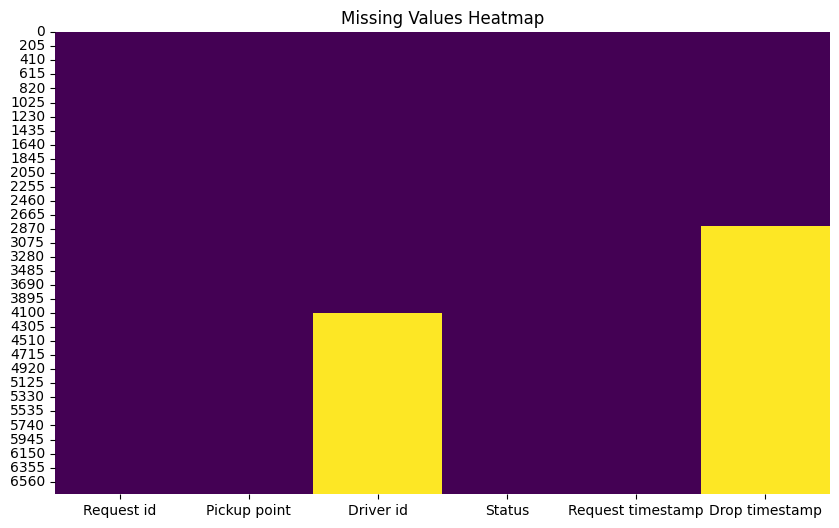

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Based on the dataset overview, here's what I've gathered about Uber Request Data.csv dataset:

* **Dataset Dimensions:**

It contains 6745 rows and 6 columns, indicating a moderately sized dataset suitable for detailed analysis.
* **Column Overview and Completeness:**
1. **Fully Populated Columns:**

Request id, Pickup point, Status, and Request timestamp are complete with no missing values.
2. **Columns with Missing Values:**
**Driver id:** Approximately 39.29% (2650 out of 6745) of entries are missing. This is a significant observation, as the absence of a driver ID likely correlates with requests that were not fulfilled (e.g., "No Cars Available" status), which is central to our supply-demand gap analysis.

**Drop timestamp:** A substantial 58.03% (3914 out of 6745) of entries are missing. This is expected and directly corresponds to requests where a trip was not completed (e.g., "Cancelled" or "No Cars Available" statuses), as a drop-off time would not exist for such instances.
* **Data Types and Consistency:**

Request id is correctly identified as int64.

Pickup point and Status are object types, indicating categorical string data, which is appropriate.

Crucially, Request timestamp and Drop timestamp are currently object (string) types.
Furthermore, their preview shows inconsistent date and time formats (e.g., "11/7/2016 11:51" vs. "13-07-2016 08:33:16"). This necessitates conversion to a proper datetime format for any time-based analysis or calculations.

Driver id is a float64, which accommodates the NaN values. Once missing values are handled, it might be suitable for conversion to an integer type if needed.
* **Duplicate Records:**

There are no exact duplicate rows in the dataset.

There are also no duplicate Request id entries, which confirms each request is uniquely identified and simplifies our analysis.

In summary, the dataset is clean in terms of duplicates and full row counts, but requires significant preprocessing, particularly for the timestamp columns due to inconsistent formatting and for handling the meaningful missing values in Driver id and Drop timestamp before any in-depth analysis can be performed.

# ***2. Understanding the Variables***

In [ ]:
# Dataset Describe
print("--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())
print("\n--- Descriptive Statistics for Categorical Columns ---")

# include='object' ensures that descriptive statistics are calculated for non-numeric columns
print(df.describe(include='object'))

--- Descriptive Statistics for Numerical Columns ---
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000

--- Descriptive Statistics for Categorical Columns ---
       Pickup point          Status Request timestamp  Drop timestamp
count          6745            6745              6745            2831
unique            2               3              5618            2598
top            City  Trip Completed    11/7/2016 8:37  12/7/2016 6:22
freq           3507            2831                 6               4


### Variables Description

* **Request id:**

**Description:** A unique identifier for each ride request made by a user.

**Data Type:** Integer (int64).

**Role:** Primary key, used to uniquely identify each transaction.
* **Pickup point:**

**Description:** The location from where the ride was requested. This is a
categorical variable indicating broad areas (e.g., "Airport", "City").

**Data Type:** Object (string).

**Role:** Critical for spatial analysis of supply-demand gaps.
* **Driver id:**

**Description:** A unique identifier for the driver assigned to a request. This column will be null (NaN) if no driver was assigned or found for the request.

**Data Type:** Float (float64) due to the presence of NaNs, but conceptually an integer.

**Role:** Indicates whether a driver was available and assigned. Its missingness is key to identifying "No Cars Available" scenarios.
* **Status:**

**Description:** The final status of the ride request. This is a categorical variable indicating the outcome (e.g., "Trip Completed", "Cancelled", "No Cars Available").

**Data Type:** Object (string).

**Role:** The core variable for understanding the outcome of a request and identifying gap scenarios.
* **Request timestamp:**

**Description:** The date and time when the user initiated the ride request.

**Data Type:** Object (string), but needs to be converted to datetime.

**Role:** Essential for temporal analysis, identifying peak hours/days, and calculating request-to-pickup times.
* **Drop timestamp:**

**Description:** The date and time when the ride was completed and the passenger was dropped off. This column will be null (NaN) if the trip was not completed.

**Data Type:** Object (string), but needs to be converted to datetime.

**Role:** Necessary for calculating trip durations. Its missingness helps identify uncompleted trips.

### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
print("--- Unique Values Count for Each Column ---")
print(df.nunique())
print("\n--- Unique Values for Categorical Columns ---")

# Printing unique values for 'Pickup point'
print("\nUnique values in 'Pickup point':")
print(df['Pickup point'].unique())

# Printing unique values for 'Status'
print("\nUnique values in 'Status':")
print(df['Status'].unique())

# Printing sample unique values for 'Driver id'
print("\nSample unique values in 'Driver id' (first 10 non-null):")
print(df['Driver id'].dropna().unique()[:10])

--- Unique Values Count for Each Column ---
Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

--- Unique Values for Categorical Columns ---

Unique values in 'Pickup point':
['Airport' 'City']

Unique values in 'Status':
['Trip Completed' 'Cancelled' 'No Cars Available']

Sample unique values in 'Driver id' (first 10 non-null):
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


# ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Defining the list of possible date formats observed in the data
date_formats = [
    '%d/%m/%Y %H:%M',
    '%d-%m-%Y %H:%M:%S',
    '%d/%m/%Y %H:%M:%S',
    '%Y-%m-%d %H:%M:%S',
    '%Y/%m/%d %H:%M:%S',
    '%d-%m-%Y %H:%M',
    '%m/%d/%Y %H:%M',
    '%m/%d/%Y %H:%M:%S'
]

In [ ]:
# Converting the Timestampt columns data into right format
def parse_date_robustly(date_string, formats):
    if pd.isna(date_string) or date_string == '': # Handle NaN or empty strings
        return pd.NaT # Return Not a Time for missing values
    for fmt in formats:
        try:
            # Try converting with the current format
            return pd.to_datetime(date_string, format=fmt)
        except ValueError:
            # If this format fails, try the next one
            continue
    # If no format works after trying all of them, return NaT
    return pd.NaT

print("Applying robust timestamp conversion ...")
# Applying the helper function to each element in the timestamp columns
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: parse_date_robustly(x, date_formats))
df['Drop timestamp'] = df['Drop timestamp'].apply(lambda x: parse_date_robustly(x, date_formats))

print("Timestamp conversion complete .")
print("\nUpdated dtypes:")
print(df[['Request timestamp', 'Drop timestamp']].dtypes)
print("\nNon-null counts after robust conversion:")
print(df[['Request timestamp', 'Drop timestamp']].notna().sum())

Applying robust timestamp conversion ...
Timestamp conversion complete .

Updated dtypes:
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

Non-null counts after robust conversion:
Request timestamp    6745
Drop timestamp       2831
dtype: int64


In [ ]:
# Feature Engineering
# Extracting Request Hour
df['Request Hour'] = df['Request timestamp'].dt.hour
print("\n'Request Hour' column created.")

# Extracting Request Day of Week
df['Request Day of Week'] = df['Request timestamp'].dt.day_name()
print("'Request Day of Week' column created.")

# Calculating Trip Duration in minutes
df['Trip Duration (minutes)'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60
print("'Trip Duration (minutes)' column created.")


'Request Hour' column created.
'Request Day of Week' column created.
'Trip Duration (minutes)' column created.


In [ ]:
# Handling Missing values in 'Driver id' column
df['Driver id'] = df['Driver id'].fillna(0).astype(int)
print("\nMissing values in 'Driver id' filled with 0 and converted to int.")


Missing values in 'Driver id' filled with 0 and converted to int.


In [ ]:
# Standardizing Categorical Columns
df['Pickup point'] = df['Pickup point'].str.strip().str.capitalize()
df['Status'] = df['Status'].str.strip().str.capitalize()
print("Categorical columns 'Pickup point' and 'Status' standardized.")


print("\n--- Data Wrangling Complete ---")
print("\nDataset Information after wrangling:")
df.info()

print("\nFirst 5 rows of the wrangled dataset:")
print(df.head())

print("\nLast 5 rows of the wrangled dataset:")
print(df.tail())

print("\nMissing values after wrangling:")
print(df.isnull().sum())

Categorical columns 'Pickup point' and 'Status' standardized.

--- Data Wrangling Complete ---

Dataset Information after wrangling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Request id               6745 non-null   int64         
 1   Pickup point             6745 non-null   object        
 2   Driver id                6745 non-null   int64         
 3   Status                   6745 non-null   object        
 4   Request timestamp        6745 non-null   datetime64[ns]
 5   Drop timestamp           2831 non-null   datetime64[ns]
 6   Request Hour             6745 non-null   int32         
 7   Request Day of Week      6745 non-null   object        
 8   Trip Duration (minutes)  2831 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(3)
memory usage: 448.0+ 

### What all manipulations have you done and insights you found?

**Manipulations Done:**

* **Timestamp Conversion:** Converted Request timestamp and Drop timestamp from varied string formats to datetime objects.
* **Feature Engineering:** Created Request Hour, Request Day of Week, and Trip Duration (minutes) from the timestamps.
* **Missing Driver id Handling:** Replaced NaN in Driver id with 0 and converted to int to signify unassigned drivers.
* **Categorical Standardization:** Cleaned Pickup point and Status columns by stripping whitespace and standardizing capitalization.

**Initial Insights Found:**

* **High Unfulfillment Rate:** A substantial 58% of all ride requests (3914 out of 6745) were unfulfilled (either cancelled or no cars available), indicating a major supply-demand gap.
* **"No Driver" is a Key Issue:** A significant portion of these unfulfilled requests (2650 instances, now marked with Driver id = 0) directly points to a shortage of available drivers.
* **Clear Gap Categories:** The Status column categorizes unfulfilled requests into "Cancelled" and "No Cars Available", which are critical for targeted analysis.
* **Defined Pickup Points:** Demand originates from two distinct and clean categories: "Airport" and "City".

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understanding the relationships between variables***

In [ ]:
# Setting consistent style for all plots
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-deep')

#### Chart - 1 - Bar Chart

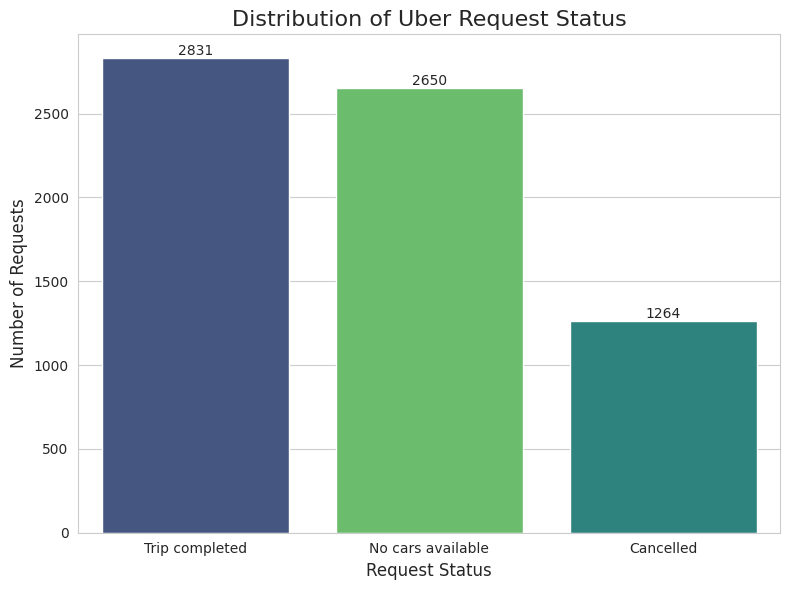

In [ ]:
# Chart - 1 Overall Request Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', hue='Status', legend=False, palette='viridis', order=df['Status'].value_counts().index)
plt.title('Distribution of Uber Request Status', fontsize=16)
plt.xlabel('Request Status', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.xticks(rotation=0)
# Adding count labels on top of bars for easy reading
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is ideal for clear visual comparison of counts across distinct categories (request statuses).

##### 2. What is/are the insight(s) found from the chart?

Over 58% of all requests are unfulfilled. "No cars available" (2650) is the dominant reason for unfulfillment, nearly double "Cancelled" requests (1264).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
* **Positive:** Quantifies the overall problem scale, guiding focus on service improvement areas.
* **Negative Growth:** High unfulfillment rates directly mean **lost revenue and increased customer churn**, as frustrated users seek alternatives.

#### Chart - 2 - Grouped Bar Chart

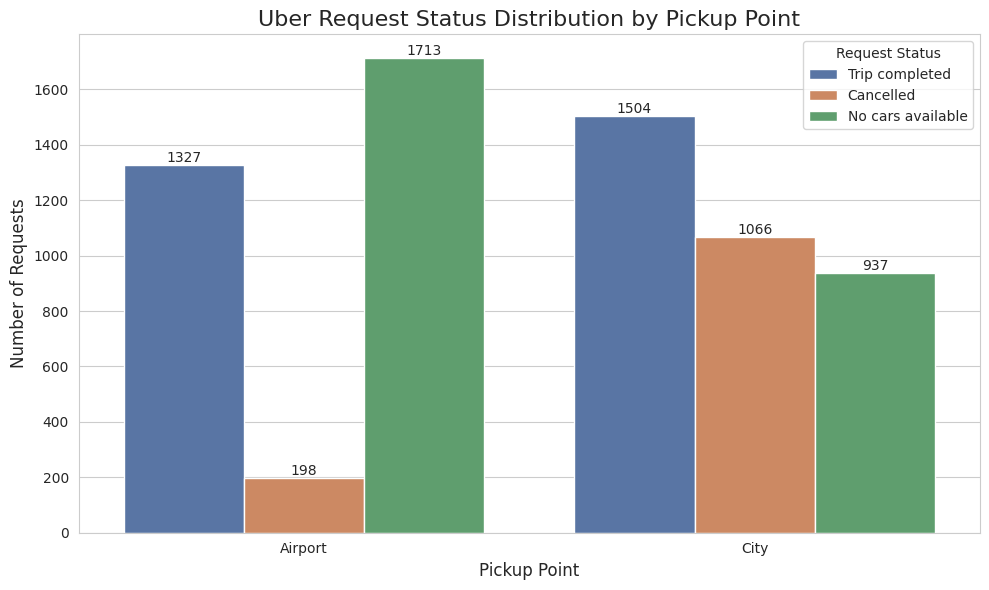

In [ ]:
# Chart - 2 Request Status Distribution by Pickup Point
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='deep')
plt.title('Uber Request Status Distribution by Pickup Point', fontsize=16)
plt.xlabel('Pickup Point', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.legend(title='Request Status')
# Adding count labels
for container in plt.gca().containers:
    plt.gca().bar_label(container)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Grouped bar chart allows direct comparison of request status breakdowns between two distinct locations (Airport vs. City).

##### 2. What is/are the insight(s) found from the chart?

* **Airport:** Predominantly suffers from "No cars available" (1713 requests), indicating severe supply shortage there.
* **City:** Experiences a higher proportion of "Cancelled" requests (1066) compared to the Airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
* **Positive:** Enables **location-specific strategies** (e.g., driver incentives for Airport supply, investigating City cancellation reasons).
* **Negative Growth:** Acute "No cars available" at Airport leads to **missed high-value trips and severe brand damage** for arriving passengers. High City cancellations reduce overall service reliability, increasing churn risk.

#### Chart - 3 - Line Plot

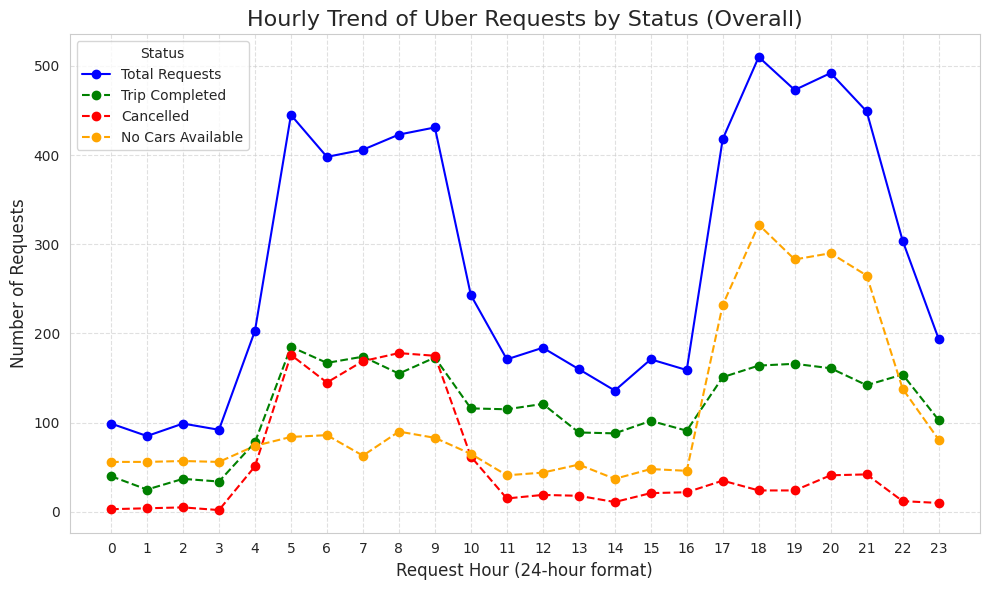

In [ ]:
# Chart - Overall Hourly Trend of Uber Requests by Status
# Creating a temporary DataFrame for hourly counts for plotting
# Group by Request Hour and Status, then unstack to get statuses as columns
hourly_status_counts = df.groupby(['Request Hour', 'Status']).size().unstack(fill_value=0)
hourly_status_counts['Total Requests'] = hourly_status_counts.sum(axis=1) # Calculating total requests per hour
plt.figure(figsize=(10, 6))
# Plotting total requests
plt.plot(hourly_status_counts.index, hourly_status_counts['Total Requests'], marker='o', linestyle='-', color='blue', label='Total Requests')
# Plotting individual statuses
plt.plot(hourly_status_counts.index, hourly_status_counts['Trip completed'], marker='o', linestyle='--', color='green', label='Trip Completed')
plt.plot(hourly_status_counts.index, hourly_status_counts['Cancelled'], marker='o', linestyle='--', color='red', label='Cancelled')
plt.plot(hourly_status_counts.index, hourly_status_counts['No cars available'], marker='o', linestyle='--', color='orange', label='No Cars Available')
plt.title('Hourly Trend of Uber Requests by Status (Overall)', fontsize=16)
plt.xlabel('Request Hour (24-hour format)', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Status')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line plot is best for visualizing trends over a continuous variable (hourly time), showing how different request statuses fluctuate throughout the day.

##### 2. What is/are the insight(s) found from the chart?

* **Morning Rush (5 AM - 10 AM):** High total demand coincides with a dramatic spike in "No cars available" requests, indicating a severe supply shortage.
* **Evening Rush (5 PM - 10 PM):** Another demand peak where "Cancelled" requests significantly increase, becoming more prominent than "No cars available."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
* **Positive:** Pinpoints exact time windows for **targeted interventions** (e.g., surge pricing, driver incentives for specific hours).
* **Negative Growth:** Consistent service failure during **peak demand hours** leads to significant **lost revenue and customer frustration**, directly impacting retention and acquisition.

#### Chart - 4 - Faceted Line Plot

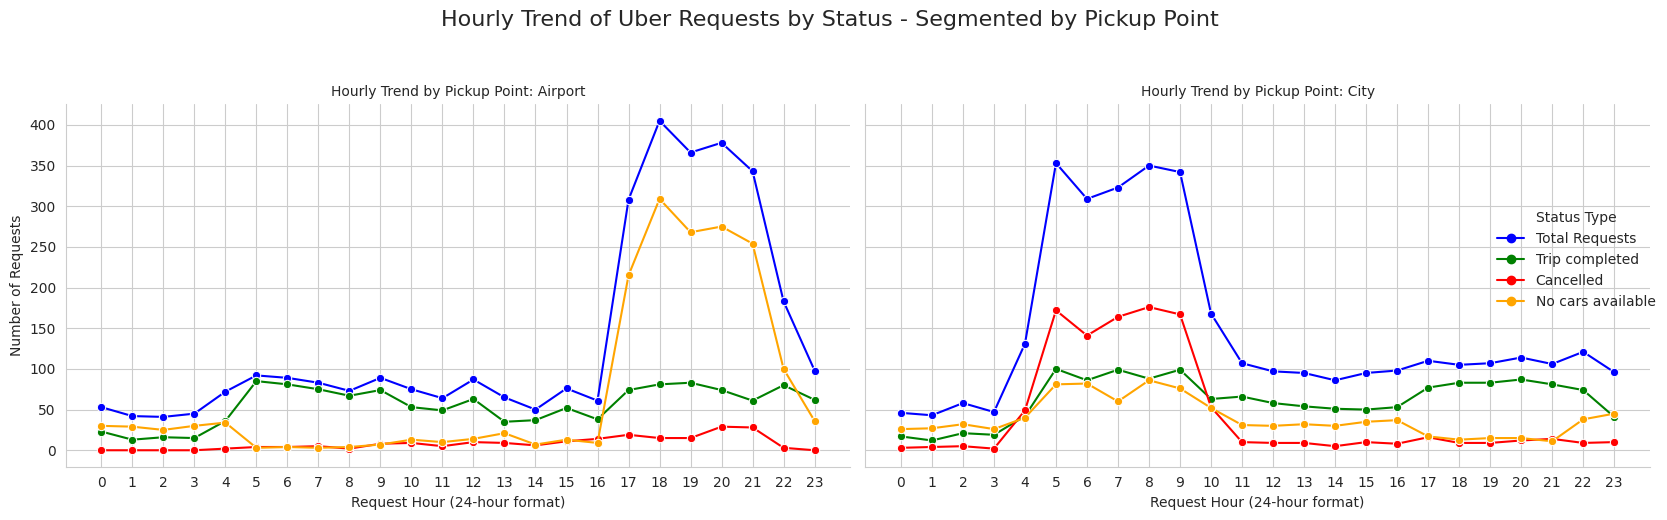

In [ ]:
# Chart - 4 Hourly Trend of Uber Requests by Status - Segmented by Pickup Point
# Group by Pickup point, Request Hour, and Status
hourly_status_by_pickup = df.groupby(['Pickup point', 'Request Hour', 'Status']).size().unstack(fill_value=0)
# Resetting index to make 'Request Hour' a column again for plotting
hourly_status_by_pickup = hourly_status_by_pickup.reset_index()
# Calculating 'Total Requests' for each segment
hourly_status_by_pickup['Total Requests'] = hourly_status_by_pickup[['Trip completed', 'Cancelled', 'No cars available']].sum(axis=1)
# Melting the DataFrame to long format for easier plotting
df_melted_hourly = hourly_status_by_pickup.melt(id_vars=['Pickup point', 'Request Hour'],
                                                value_vars=['Total Requests', 'Trip completed', 'Cancelled', 'No cars available'],
                                                var_name='Status Type', value_name='Number of Requests')
# Creating the faceted line plot
g = sns.relplot(
    data=df_melted_hourly,
    x='Request Hour',
    y='Number of Requests',
    col='Pickup point', # Creating separate columns for each Pickup point
    hue='Status Type',  # Differentiating lines by Status Type
    kind='line',
    marker='o',         # Adding markers for data points
    height=5, aspect=1.5,
    palette={'Total Requests': 'blue', 'Trip completed': 'green', 'Cancelled': 'red', 'No cars available': 'orange'}
)
g.set_axis_labels("Request Hour (24-hour format)", "Number of Requests")
g.set_titles("Hourly Trend by Pickup Point: {col_name}", fontsize=14)
g.set(xticks=range(0, 24))
g.fig.suptitle('Hourly Trend of Uber Requests by Status - Segmented by Pickup Point', y=1.03, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


##### 1. Why did you pick the specific chart?

Faceted line plots combine time and location for the most granular "when and where" analysis of specific service issues.

##### 2. What is/are the insight(s) found from the chart?

* **Airport (5 AM - 10 AM):** Displays an acute "No cars available" crisis, severely impacting morning departures/arrivals.
* **City (5 PM - 10 PM):** Shows a significant "Cancelled" problem, indicating issues within city limits during evening peaks.
* The problems are distinct for each location at specific times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
* **Positive:** Allows for **highly precise and effective operational changes** (e.g., direct driver incentives to Airport 5-10 AM; detailed investigation of City evening cancellations).
* **Negative Growth:** These precisely identified **recurring failure points** (e.g., Airport morning, City evening) represent systemic issues causing **major lost market share and customer erosion** in critical service segments.

# **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

My suggestions to the client to achive Business Objective are :
* **Boost Airport Morning Supply (5 AM - 10 AM):** Implement targeted driver incentives for Airport pickups during these hours. This directly addresses the severe "no cars available" issue where demand is unmet.
* **Reduce City Evening Cancellations (5 PM - 10 PM):** Analyze root causes of high cancellations in the City during these peaks (e.g., driver preferences, rider waits). Consider solutions like minimum fare guarantees for short trips. This improves reliability and reduces lost trips.
* **Optimize Overall Driver Allocation:** Use predictive analytics to pre-position drivers in high-demand areas before peaks. This ensures more efficient use of the existing driver pool across all busy periods.
* **Improve Rider Communication:** Provide clearer communication to riders about wait times or unavailability. This manages expectations and can reduce rider-initiated cancellations due to frustration.

# **Conclusion**

The analysis clearly reveals that Uber faces a significant **supply-demand gap**, with over 58% of ride requests going unfulfilled. The problem is not uniform but concentrated in specific time-location segments, presenting actionable opportunities for improvement.

The most critical bottlenecks are:

* An **acute driver supply shortage at the Airport during morning rush hours (5 AM - 10 AM)**, leading to a high volume of "No cars available" instances.
* A **pronounced cancellation problem within the City during evening rush hours (5 PM - 10 PM)**, indicating potential issues with driver acceptance or rider experience during peak urban demand.

To achieve its business objective of reducing the supply-demand gap, Uber should implement **highly targeted interventions**. This includes strategic driver incentives for Airport pickups in the morning and a focused investigation into and mitigation of cancellation reasons for City rides in the evening. By addressing these specific demand-supply imbalances, Uber can significantly enhance service reliability, boost customer satisfaction, and ultimately drive greater revenue and market share.